In [1]:
# UFRJ/COPPE/PEE - Processamento de Sinais Aleatórios - 2019.3
# Professor: Luiz Wagner Pereira Biscainho
# Exercicio C3 - Projeto de Filtro Lattice
# Aluna: Maria Gabriella Andrade Felgas

# Importando as bibliotecas necessarias
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, linalg

In [2]:
# Definindo parametros

# Funcoes

# Funcao que cria os desvios padroes de teste
def var_stds(num_stds):
    return 2 ** np.arange(num_stds, dtype=np.int)

# Funcao que cria as amplitudes de teste
def var_amps(num_amps):
    return 10 ** np.arange(num_amps, dtype=np.int)

# Funcao que cria as frequencias de teste
def var_freqs(num_freqs):
    for i in range(num_freqs):
        omega[i] = np.pi / (i + 2)
    return np.round(omega, 3)

In [3]:
# Definindo o numero de amostras de teste, N
num_samples = 1000
print('Numero de amostras: ', num_samples)

# Definindo o valor de phi
phi = np.round(np.pi / 2, 3)
print('phi = ', phi, ' [rad]')

# Definindo o numero de testes
# de cada parametro
num_stds = 3
num_amps = 3
num_freqs = 5

stds = var_stds(num_stds)
print('Desvios padrao de teste: ', stds)

A = var_amps(num_amps)
print('Amplitudes de teste: ', A)

omega = np.zeros((num_freqs))
omega = var_freqs(num_freqs)
print('Frequencias de teste: ', omega, '[rad/s]')

Numero de amostras:  1000
phi =  1.571  [rad]
Desvios padrao de teste:  [1 2 4]
Amplitudes de teste:  [  1  10 100]
Frequencias de teste:  [1.571 1.047 0.785 0.628 0.524] [rad/s]


In [4]:
# Funcao de inicializacao do ruido branco
# com media 0 e variancia variavel
def init_ruido(std, num_samples):
    # media nula fixada
    w = np.random.normal(0, std, size=num_samples)
    show_ruido(w, std)    
    return w

# Funcao de visualizacao do ruido
def show_ruido(w, std):
    plt.figure(figsize=(10, 5))
    plt.plot(w)
    plt.title('Ruído Branco, w(n), Média = 0, Desvio Padrão = {}.'.format(std))
    plt.xlabel('n [amostras]')
    plt.ylabel('w(n)')
    plt.margins(0, 0.1)
    plt.grid(which='both', axis='both')
    plt.show()

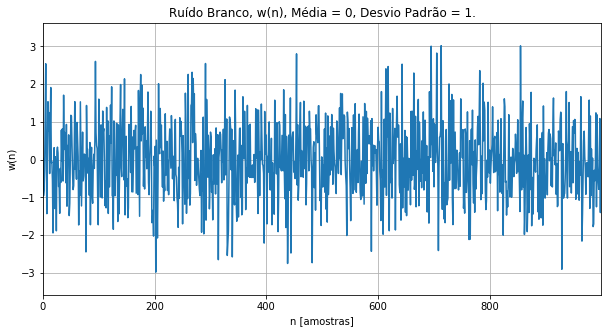

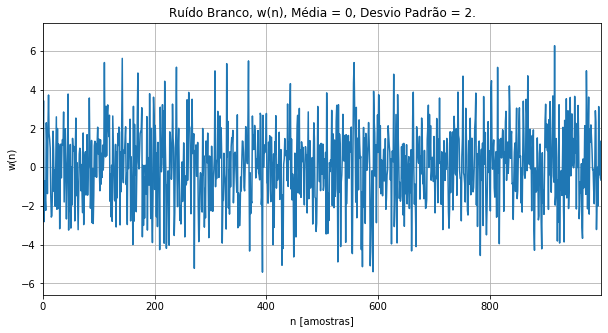

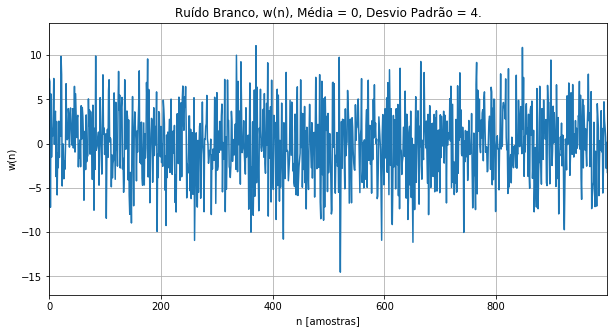

In [5]:
# Inicializando o ruido
w = np.zeros((num_stds, num_samples))
for std in range(num_stds):
    w[std] = init_ruido(stds[std], num_samples)

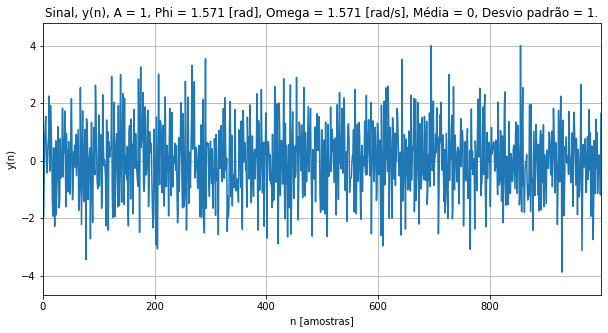

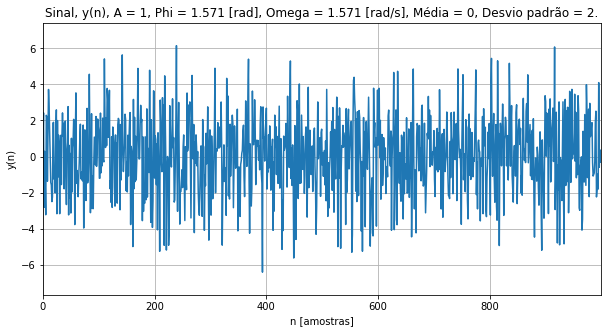

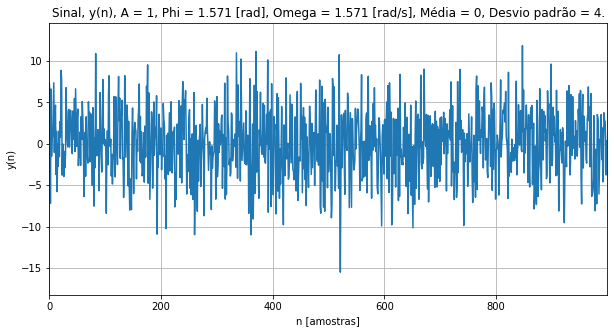

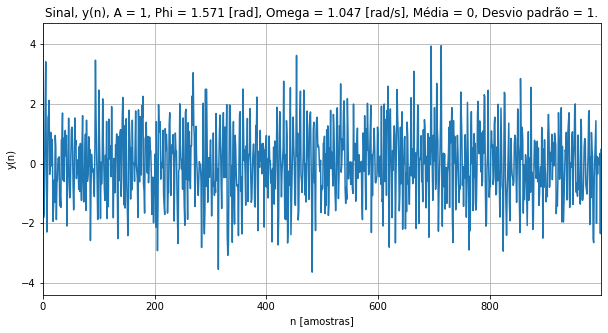

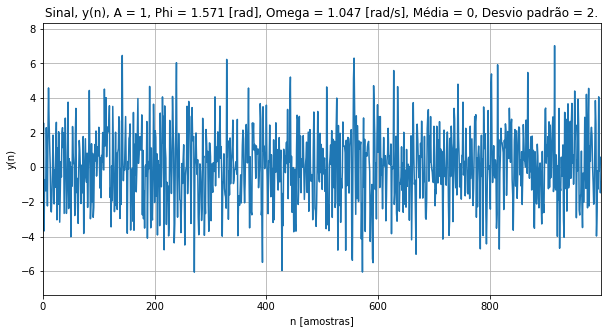

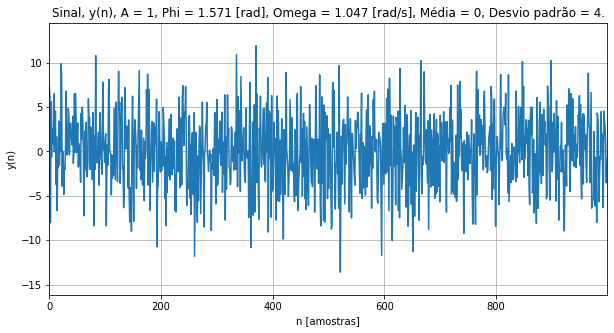

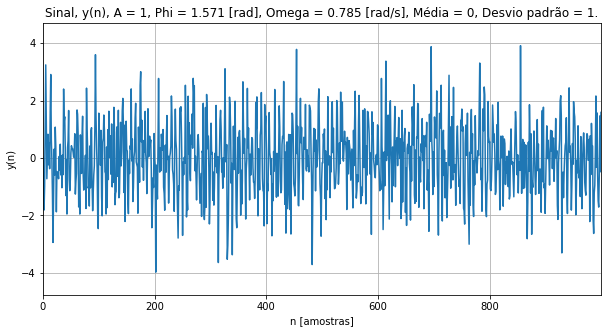

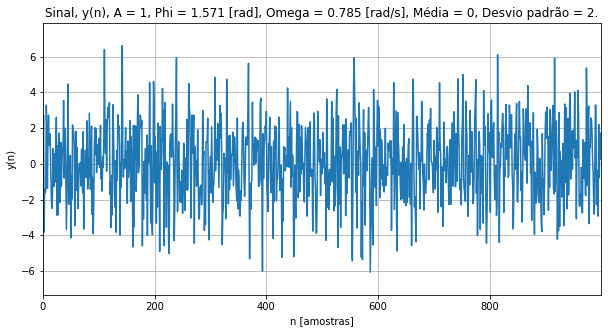

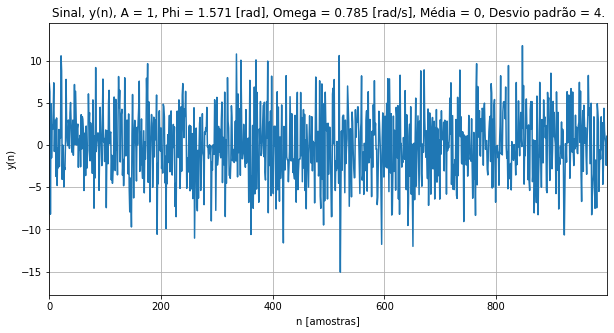

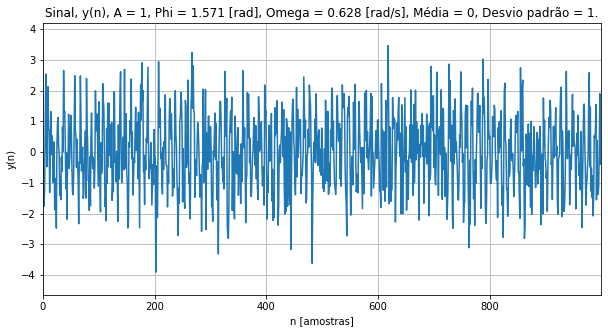

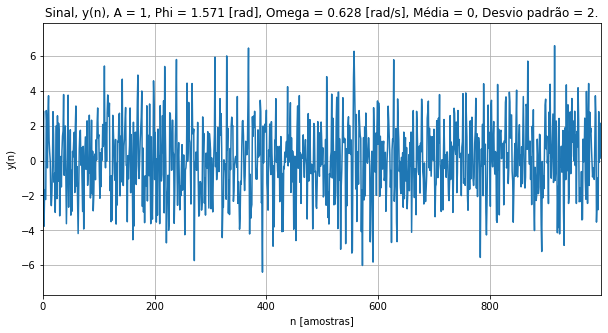

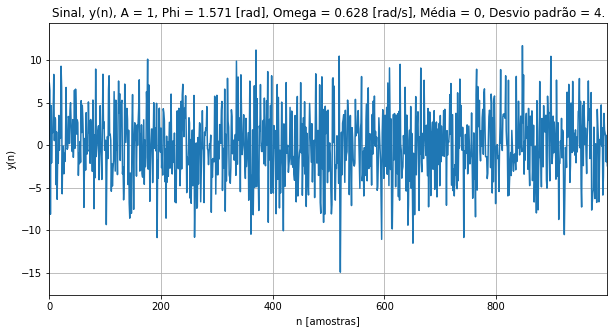

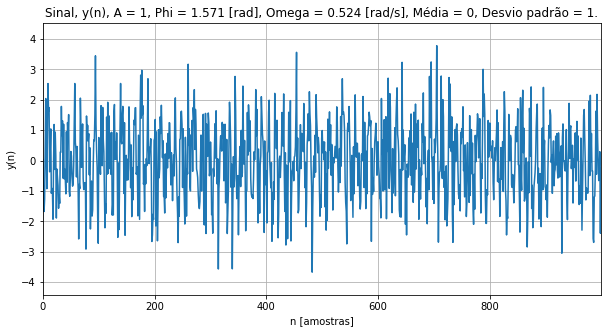

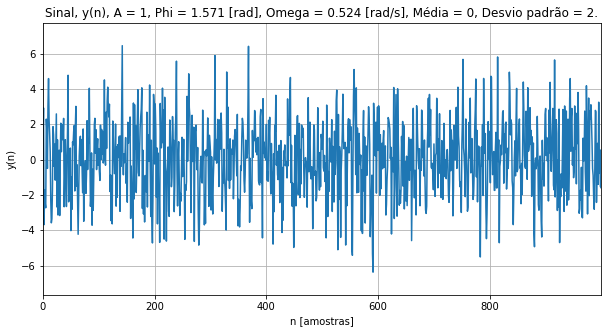

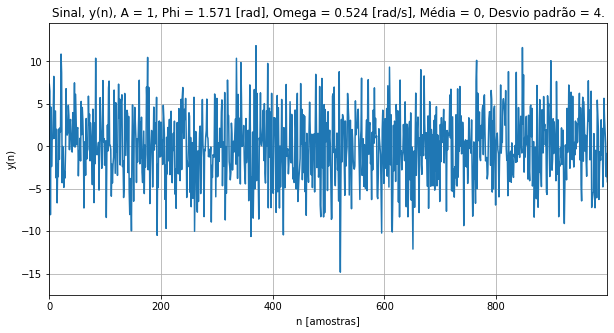

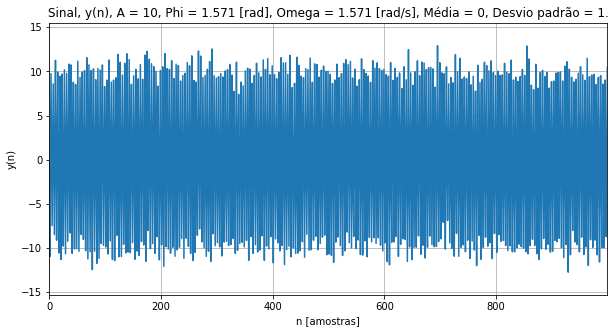

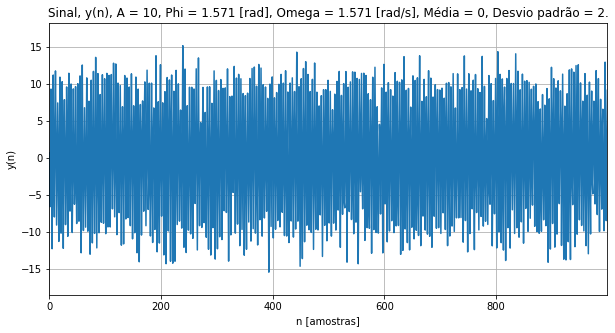

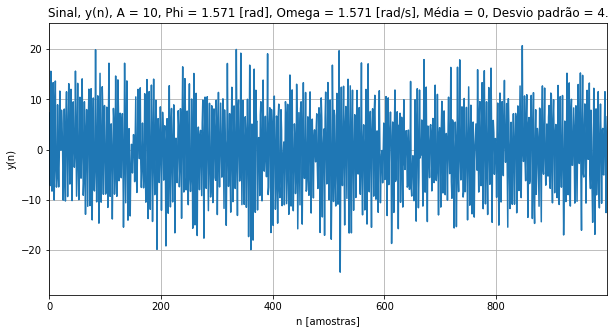

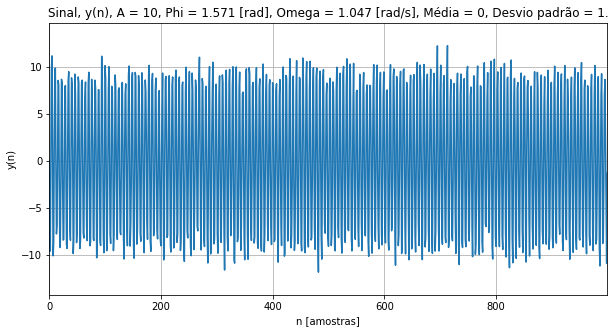

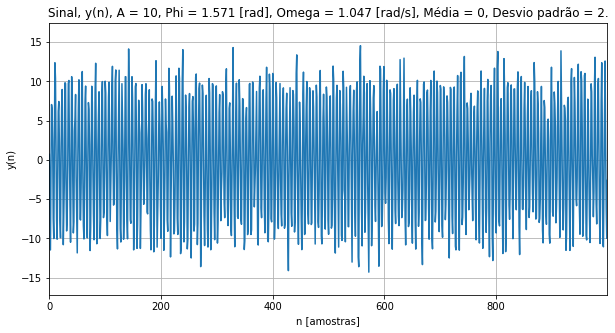

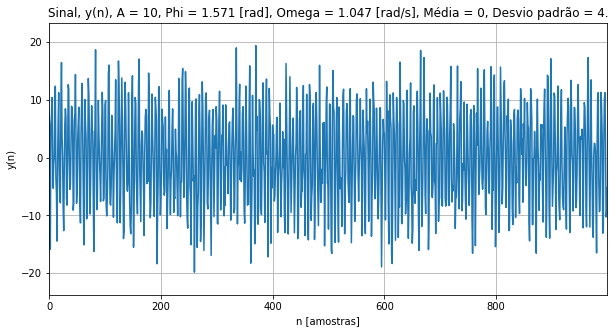

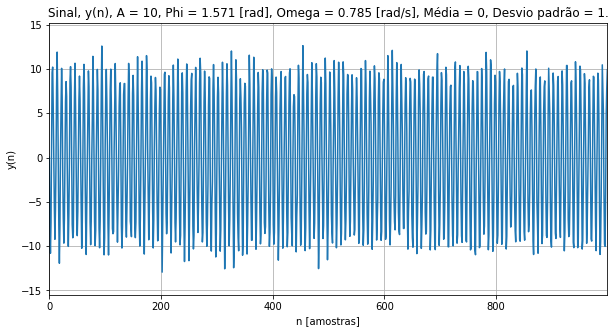

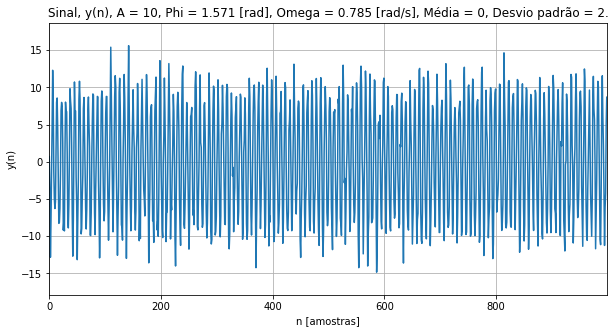

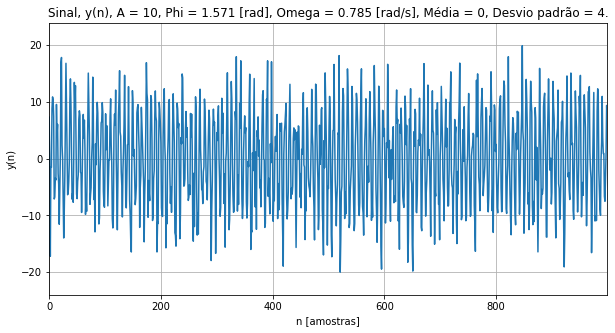

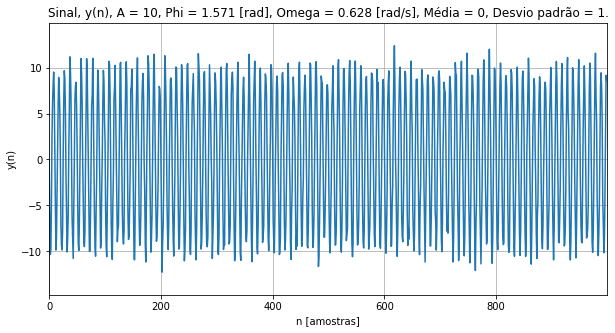

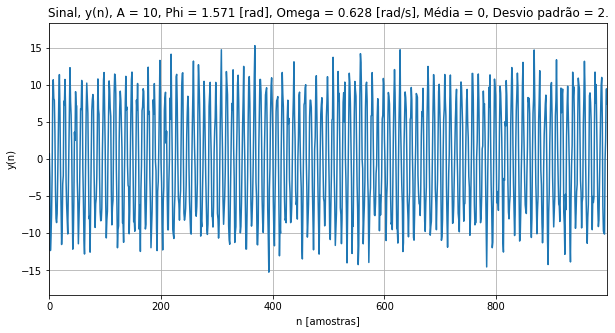

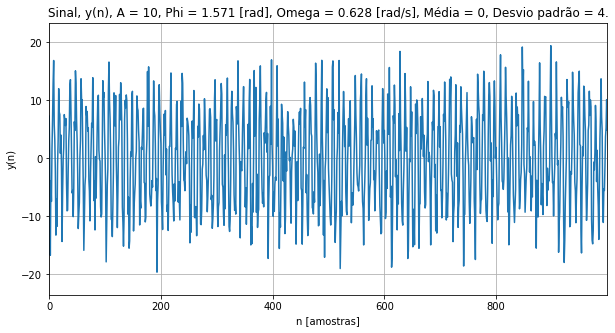

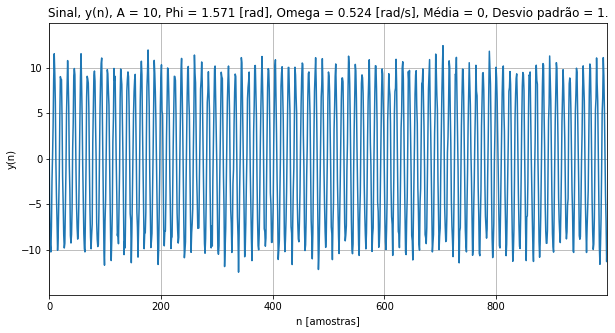

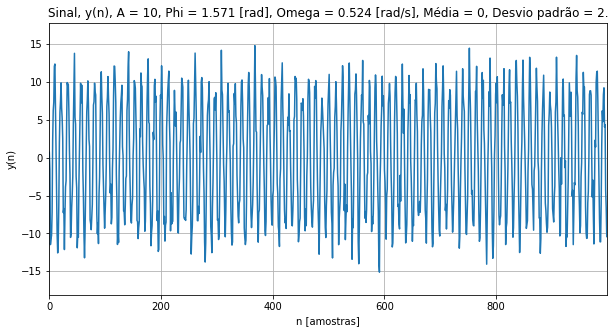

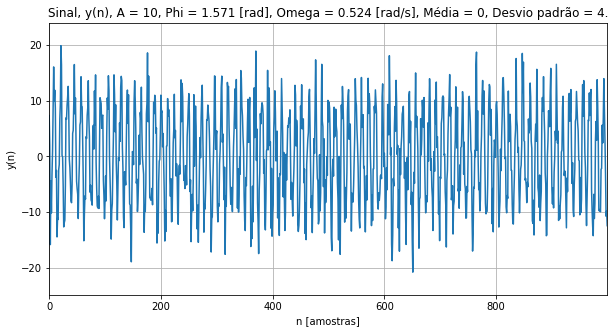

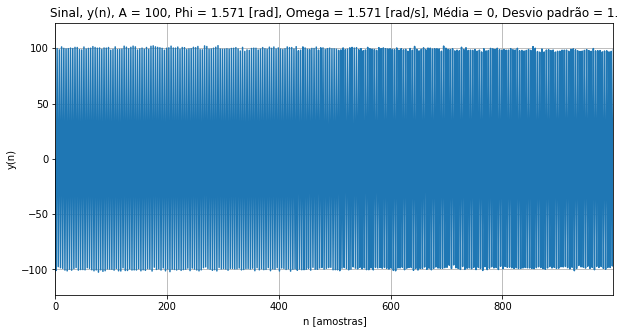

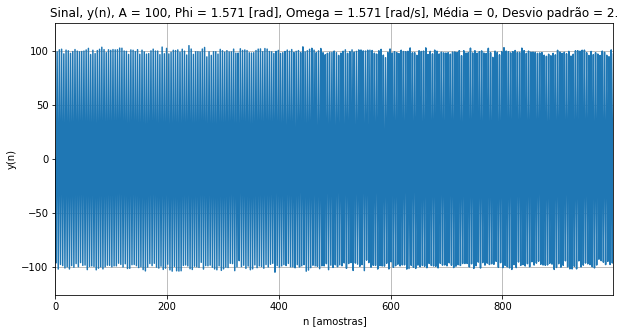

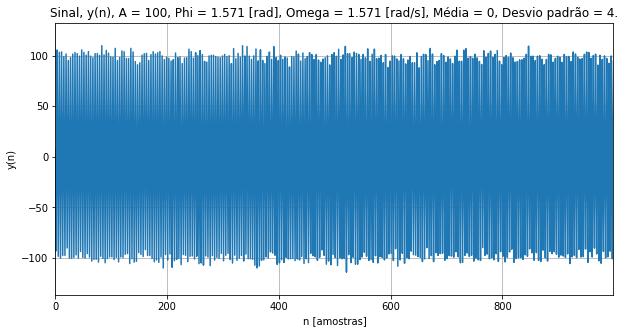

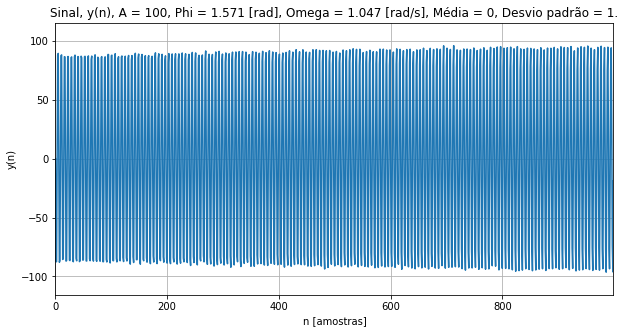

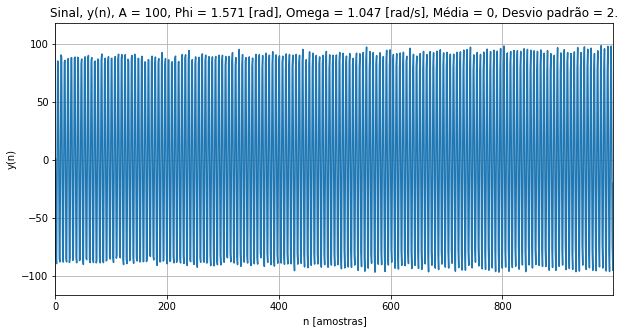

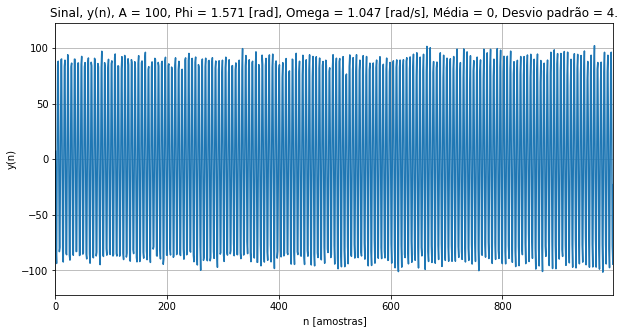

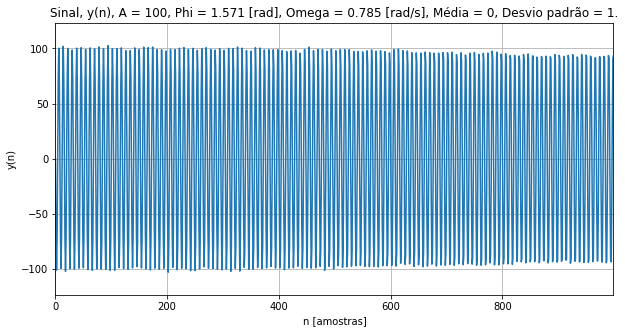

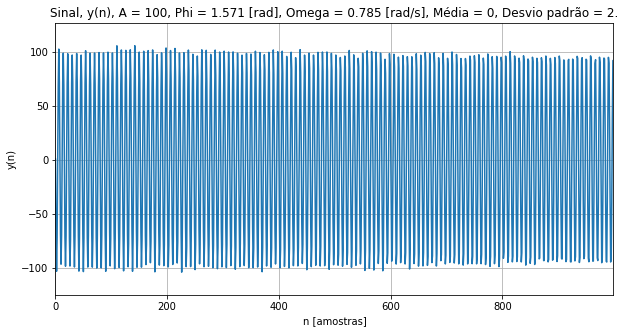

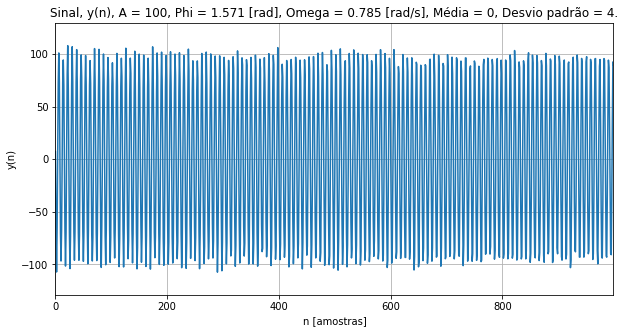

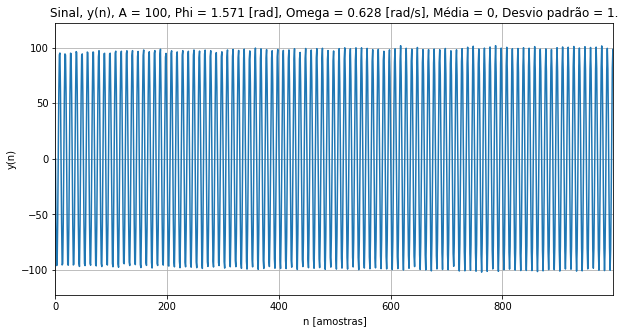

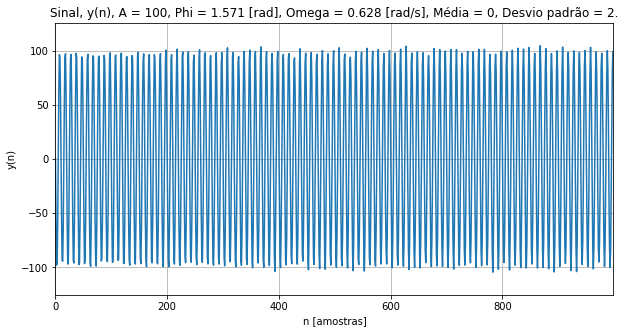

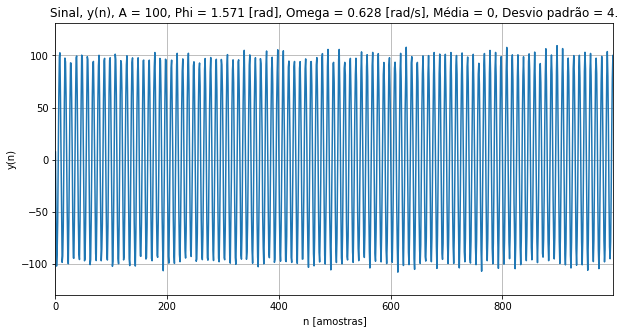

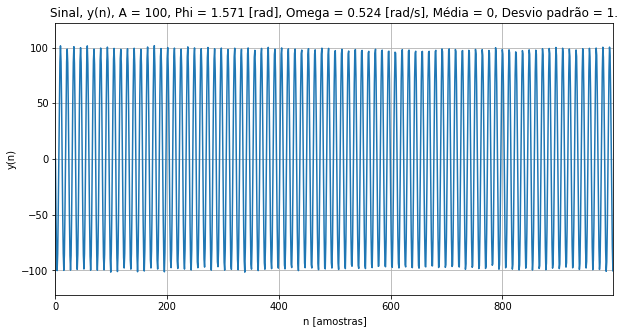

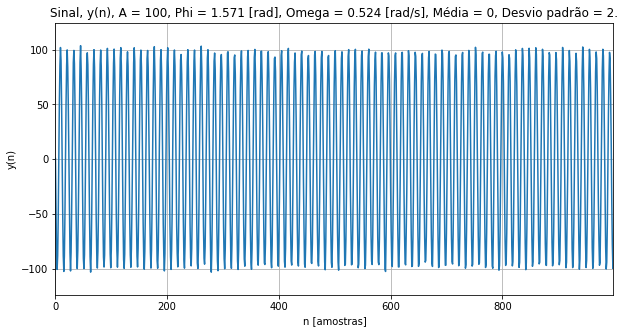

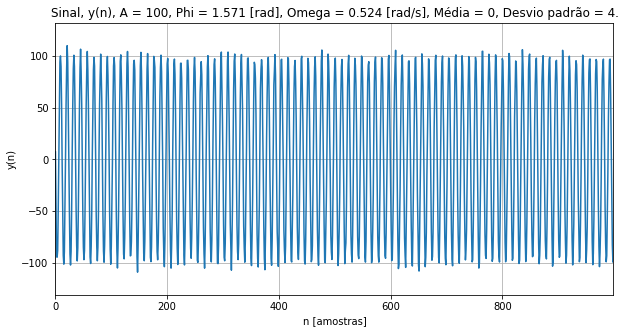

In [6]:
# Calculo de y(n) = A*cos(n*omega_0 + phi) + w(n)

y = np.zeros((num_amps, num_freqs, num_stds, num_samples))

for a in range(num_amps):
    for f in range(num_freqs):
        for s in range(num_stds):
            for n in range(num_samples):
                y[a, f, s, n] = A[a] * np.cos(n * omega[f] + phi) + w[s, n]
            
            # Visualizando cada y(n) de acordo com
            # os parametros de teste
            plt.figure(figsize=(10, 5))
            plt.plot(y[a, f, s])
            plt.title('Sinal, y(n), A = {}, Phi = {} [rad], Omega = {} [rad/s], Média = 0, Desvio padrão = {}.'.format(A[a],\
                                                                                                                       phi,\
                                                                                                                       omega[f],\
                                                                                                                       stds[s]))
            plt.xlabel('n [amostras]')
            plt.ylabel('y(n)')
            plt.margins(0, 0.1)
            plt.grid(which='both', axis='both')
            plt.show()

In [7]:
# Aplicando a estimativa de frequencia
# pelo metodo que utiliza o Filtro Lattice

r1 = np.zeros((num_amps, num_freqs, num_stds))
r2 = np.zeros((num_amps, num_freqs, num_stds))
r3 = np.zeros((num_amps, num_freqs, num_stds)) 

gamma_1 = np.zeros((num_amps, num_freqs, num_stds))
omega_0 = np.zeros((num_amps, num_freqs, num_stds))

print('----------------------------------------------')
print('############### Filtro Lattice ###############')
print('----------------------------------------------')

for f in range(num_freqs):
    for a in range(num_amps):
        for s in range(num_stds):
            for n in range(2, num_samples):
                r1[a, f, s] += y[a, f, s, n] * y[a, f, s, (n - 1)]
                r2[a, f, s] += y[a, f, s, (n - 1)] * y[a, f, s, (n - 2)]
                r3[a, f, s] += y[a, f, s, (n - 1)] * y[a, f, s, (n - 1)]

            gamma_1[a, f, s] = - (r1[a, f, s] + r2[a, f, s]) / (2 * r3[a, f, s])
            omega_0[a, f, s] = np.arccos((- (gamma_1[a, f, s] * ((stds[s] ** 2) + ((A[a] ** 2) / 2)))) / ((A[a] ** 2) / 2))
            
            # Comparacao dos valores encontrados
            print('----------------------------------------------')
            print('Frequência real: ', omega[f])
            print('Para amplitude = {} e variância = {}:'.format(A[a], stds[s] ** 2))
            print('SNR = ', A[a] / (stds[s] ** 2))
            print('Frequência estimada: ', np.round(omega_0[a, f, s], 3))
            print('----------------------------------------------')

----------------------------------------------
############### Filtro Lattice ###############
----------------------------------------------
----------------------------------------------
Frequência real:  1.571
Para amplitude = 1 e variância = 1:
SNR =  1.0
Frequência estimada:  1.589
----------------------------------------------
----------------------------------------------
Frequência real:  1.571
Para amplitude = 1 e variância = 4:
SNR =  0.25
Frequência estimada:  1.115
----------------------------------------------
----------------------------------------------
Frequência real:  1.571
Para amplitude = 1 e variância = 16:
SNR =  0.0625
Frequência estimada:  2.407
----------------------------------------------
----------------------------------------------
Frequência real:  1.571
Para amplitude = 10 e variância = 1:
SNR =  10.0
Frequência estimada:  1.571
----------------------------------------------
----------------------------------------------
Frequência real:  1.571
Para ampl

C:\Users\gabri\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in arccos


In [8]:
# Funcao que descreve o metodo de Burg
# Ref: Algoritmo proposto pelo Livro, pg. 319
def burg(y, p):
    N = y.shape[0]
    eplus = y[1:N]
    eminus = y[0:(N - 1)]
    N = N - 1
    
    gamma = np.zeros((p))
    err = np.zeros((p))
    
    for i in range(p):
        gamma[i] = - 2 * np.dot(eminus.T, eplus)/(np.dot(eplus.T, eplus) + np.dot(eminus.T, eminus))
        
        temp1 = eplus + np.dot(gamma[i], eminus)
        temp2 = eminus + np.dot(np.conj(gamma[i]), eplus)
        
        err[i] = np.dot(temp1.T, temp1) + np.dot(temp2.T, temp2)
        
        eplus = temp1[1:N]
        eminus = temp2[1:(N - 1)]
        N = N - 1
    
    return gamma, err

In [9]:
# Aplicando a estimativa de frequencia
# pelo metodo de Burg

p = 1
gamma = np.zeros((num_amps, num_freqs, num_stds, p))
err = np.zeros((num_amps, num_freqs, num_stds, p))

print('----------------------------------------------')
print('############### Método de Burg ###############')
print('----------------------------------------------')

for f in range(num_freqs):
    for a in range(num_amps):
        for s in range(num_stds):
            gamma[a, f, s], err[a, f, s] = burg(y[a, f, s], p)
            omega_0[a, f, s] = np.arccos((- (gamma[a, f, s] * ((stds[s] ** 2) + ((A[a] ** 2) / 2)))) / ((A[a] ** 2) / 2))
            
            # Comparacao dos valores encontrados
            print('----------------------------------------------')
            print('Frequência real: ', omega[f])
            print('Para amplitude = {} e variância = {}:'.format(A[a], stds[s] ** 2))
            print('SNR = ', A[a] / (stds[s] ** 2))
            print('Frequência estimada: ', np.round(omega_0[a, f, s], 3))
            print('----------------------------------------------')

----------------------------------------------
############### Método de Burg ###############
----------------------------------------------
----------------------------------------------
Frequência real:  1.571
Para amplitude = 1 e variância = 1:
SNR =  1.0
Frequência estimada:  1.591
----------------------------------------------
----------------------------------------------
Frequência real:  1.571
Para amplitude = 1 e variância = 4:
SNR =  0.25
Frequência estimada:  1.113
----------------------------------------------
----------------------------------------------
Frequência real:  1.571
Para amplitude = 1 e variância = 16:
SNR =  0.0625
Frequência estimada:  2.344
----------------------------------------------
----------------------------------------------
Frequência real:  1.571
Para amplitude = 10 e variância = 1:
SNR =  10.0
Frequência estimada:  1.571
----------------------------------------------
----------------------------------------------
Frequência real:  1.571
Para ampl

C:\Users\gabri\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in arccos
  app.launch_new_instance()


In [10]:
###### PRECISA DE REVISAO ######

# Funcao que descreve o metodo da
# covariancia modificado
# Ref: Algoritmo proposto pelo Livro, pg. 324
def mcov(y, p):
    N = y.shape[0]
    
    # Gerando a matriz toeplitz para
    # o sistema de equacoes
    Y = linalg.toeplitz(y[p:N], np.flipud(y[:(p + 1)]))
    
    R = np.dot(Y.T, Y)
    R1 = R[1:(p + 1), 1:(p + 1)]
    R2 = np.flipud(np.fliplr(R[:p, :p]))    
    b1 = R[1:(p + 1), 0]
    b2 = np.flipud(R[:p, p])
    
    # Descobrindo os parametros a(k)
    aux1 = np.array([1]).reshape(-1, 1)
    aux2 = - (R1 + R2) / (b1 + b2)
    a = np.concatenate((aux1, aux2), axis=0)
    
    err = np.dot(R[0, :].reshape(1, 2), a) + np.dot(np.fliplr(R[p, :].reshape(1, 2)), a)
    
    return a, err

In [11]:
# Aplicando a estimativa de frequencia
# pelo metodo da covariancia modificado

p = 1
coef = np.zeros((num_amps, num_freqs, num_stds, (p + 1), 1))
err = np.zeros((num_amps, num_freqs, num_stds, p))
gamma = np.zeros((num_amps, num_freqs, num_stds, p))

print('----------------------------------------------------------------')
print('############### Método da Covariância Modificado ###############')
print('----------------------------------------------------------------')

for f in range(num_freqs):
    for a in range(num_amps):
        for s in range(num_stds):
            coef[a, f, s], err[a, f, s] = mcov(y[a, f, s], p)
            gamma[a, f, s] = coef[a, f, s, 1] / 2
            
            omega_0[a, f, s] = np.arccos((- (gamma[a, f, s] * ((stds[s] ** 2) + ((A[a] ** 2) / 2)))) / ((A[a] ** 2) / 2))
            
            # Comparacao dos valores encontrados
            print('----------------------------------------------------------------')
            print('Frequência real: ', omega[f])
            print('Para amplitude = {} e variância = {}:'.format(A[a], stds[s] ** 2))
            print('SNR = ', A[a] / (stds[s] ** 2))
            print('Frequência estimada: ', np.round(omega_0[a, f, s], 3))
            print('----------------------------------------------------------------')

C:\Users\gabri\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in arccos


----------------------------------------------------------------
############### Método da Covariância Modificado ###############
----------------------------------------------------------------
----------------------------------------------------------------
Frequência real:  1.571
Para amplitude = 1 e variância = 1:
SNR =  1.0
Frequência estimada:  nan
----------------------------------------------------------------
----------------------------------------------------------------
Frequência real:  1.571
Para amplitude = 1 e variância = 4:
SNR =  0.25
Frequência estimada:  nan
----------------------------------------------------------------
----------------------------------------------------------------
Frequência real:  1.571
Para amplitude = 1 e variância = 16:
SNR =  0.0625
Frequência estimada:  nan
----------------------------------------------------------------
----------------------------------------------------------------
Frequência real:  1.571
Para amplitude = 10 e variânci

In [16]:
###### PRECISAM DE REVISAO ######

# Funcao que monta a matriz toeplitz
# para resolver o sistema de equacoes
def convm(x, p):
    padding = np.zeros(p, x.dtype)
    
    first_col = x
    first_row = np.r_[x[0], padding]
    
    conv_matrix = linalg.toeplitz(first_col, first_row)
    
    return conv_matrix

# Funcao que descreve o metodo da
# autocorrelacao
# Ref: Algoritmo proposto pelo Livro, pg. 181
def autocorr(y, p):
    N = y.shape[0]
    
    # Gerando a matriz toeplitz para
    # o sistema de equacoes
    Y = convm(y, (p))
    
    # Descobrindo os parametros a(k)
    a_A = Y[:(N + p - 2), :p]
    a_b = Y[1:(N + p - 1), 0].reshape(-1, 1)
    aux1 = np.array([1]).reshape(-1, 1)     
    q, r = np.linalg.qr(a_A)
    aux2 = - np.linalg.solve(r, np.dot(q.T, a_b))
    aux2 = aux2.reshape((-1, 1))    
    a = np.concatenate((aux1, aux2), axis=0)
    
    # Calculando o erro
    err = np.abs(np.dot(np.dot(Y[:(N + p), 0].T, Y), a))
    
    return a, err

In [17]:
# Aplicando a estimativa de frequencia
# pelo metodo da autocorrelacao

p = 1
coef = np.zeros((num_amps, num_freqs, num_stds, (p + 1), 1))
err = np.zeros((num_amps, num_freqs, num_stds, p))
gamma = np.zeros((num_amps, num_freqs, num_stds, p))

print('--------------------------------------------------------')
print('############### Método da Autocorrelação ###############')
print('--------------------------------------------------------')

for f in range(num_freqs):
    for a in range(num_amps):
        for s in range(num_stds):
            coef[a, f, s], err[a, f, s] = autocorr(y[a, f, s], p)
            gamma[a, f, s] = coef[a, f, s, 1] / 2
            
            omega_0[a, f, s] = np.arccos((- (gamma[a, f, s] * ((stds[s] ** 2) + ((A[a] ** 2) / 2)))) / ((A[a] ** 2) / 2))
            
            # Comparacao dos valores encontrados
            print('--------------------------------------------------------')
            print('Frequência real: ', omega[f])
            print('Para amplitude = {} e variância = {}:'.format(A[a], stds[s] ** 2))
            print('SNR = ', A[a] / (stds[s] ** 2))
            print('Frequência estimada: ', np.round(omega_0[a, f, s], 3))
            print('--------------------------------------------------------')

--------------------------------------------------------
############### Método da Autocorrelação ###############
--------------------------------------------------------
--------------------------------------------------------
Frequência real:  1.571
Para amplitude = 1 e variância = 1:
SNR =  1.0
Frequência estimada:  1.581
--------------------------------------------------------
--------------------------------------------------------
Frequência real:  1.571
Para amplitude = 1 e variância = 4:
SNR =  0.25
Frequência estimada:  1.348
--------------------------------------------------------
--------------------------------------------------------
Frequência real:  1.571
Para amplitude = 1 e variância = 16:
SNR =  0.0625
Frequência estimada:  1.927
--------------------------------------------------------
--------------------------------------------------------
Frequência real:  1.571
Para amplitude = 10 e variância = 1:
SNR =  10.0
Frequência estimada:  1.571
---------------------------